## Data Science Assignment 6
##### Name: Venkata Sai Manoj Boganadham
##### Roll no: 197121
##### Section: A

### 1. Multi-class Logistic Regression from scratch

Here we are going to perform Logistic Regression on the Iris dataset from Kaggle.

Dataset link: https://www.kaggle.com/uciml/iris

First let us import the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
data = pd.read_csv('Iris.csv')
data = data.sample(frac=1)
data = data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,6.0,2.9,4.5,1.5,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
data=np.array(data) 
X=data[:,:-1]
Y=data[:,-1]
labels=np.unique(Y)
print(labels)
# Turning the labels into numbers
for i in range (len(Y)):
  Y[i]=list(labels).index(Y[i])
Y=Y.astype('int32')
print(Y.dtype)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
int32


In [5]:
# splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Scaling the data
X=preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [6]:
def oneHotEncode(y,c):
    #encoding y as a matrix in which the correct ans is 1, and rest entries 0.
    y_hot = np.zeros((len(y), c))
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

In [2]:
# multiclass classification hypothesis function is softmax function
def softmax(z):
    exp = np.exp(z)
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    return exp

In [8]:
# gradient function for softmax regression
def grad(X, y, y_hat):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db

In [9]:
# Training the model
def train(X, y,epochs,c,lr): 
    m, n = X.shape
    w = np.zeros((n,c))
    b = 0
    losses = []
    # running iterations
    for i in range(epochs):
            z=np.dot(X,w)+b
            y_hat = softmax(z)
            y_hot=oneHotEncode(y,c)
            dw, db = grad(X, y_hot, y_hat)
            w -= lr*dw
            b -= lr*db
            loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
            losses.append(loss)
        # Plot the cost against iterations
    plt.plot(np.arange(1,epochs),losses[1:])
    plt.xlabel("number of epochs")
    plt.ylabel("loss")
    return w, b

In [10]:
def predictions(X, w, b):
    z = np.dot(X,w) + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

3
int32


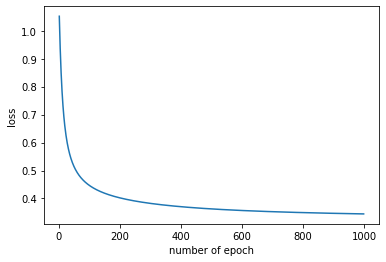

In [11]:
# training the model
c=len(labels)
print(c)
print(y_train.dtype)
w,b=train(x_train,y_train,1000,c,0.05)

In [12]:
#testing on test data
y_pred=predictions(x_test,w,b)
print(y_pred)
print(y_test)

[0 1 0 1 1 2 0 0 2 2 2 1 1 0 2 2 1 0 0 1 2 0 1 0 0 2 0 1 2 2]
[0 1 0 1 1 2 0 0 2 2 1 1 1 0 1 1 1 0 0 1 2 0 1 0 0 2 0 2 2 1]


In [13]:
# Finding the accuracy of the model
positive=0
length=0

for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    positive+=1
  length+=1

accuracy=positive/length
print("Accuracy: ",accuracy*100)

Accuracy:  83.33333333333334


-----------------------------------------

### 2. Support Vector Machines (SVM) for Linear and Polynomial kernel from scratch using the following dataset.
Link:
https://www.kaggle.com/uciml/iris [Iris dataset has three classes, remove any one of the
classes and use the dataset]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Importing the dataset
data = pd.read_csv('Iris.csv')
data=data.drop('Id',axis=1)
data.head()

Saving Iris.csv to Iris (2).csv


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn import preprocessing

# Splitting the dataset into dependent and independent variables
data=np.array(data) 
X=data[:100,:-1]
Y=data[:100,-1]
labels=np.unique(Y)
print(labels)
# Convert labels into numbers
for i in range (len(Y)):
  Y[i]=list(labels).index(Y[i])
Y=Y.astype('int32')
Y=np.array(Y)
Y=np.where(Y<=0,-1,1)
print(Y.dtype)

# Scaling the independent variables
X=preprocessing.scale(X)
print(np.shape(X));

['Iris-setosa' 'Iris-versicolor']
int64
(100, 4)


In [16]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=25)

In [17]:
# training function for SVM
def train(X,y,epochs,lr,l):
  n=X.shape[1]
  w=np.zeros(n)
  b=0
  for _ in range(epochs):
    for i,x in enumerate(X):
      cond=y[i]*(np.dot(x,w)-b)>=1
      if cond:
        w-=lr*(2*l*w)
      else:
        w-=lr*(2*l*w-np.dot(x,y[i]))
        b=lr*y[i]
  return w,b

In [18]:
def predictions(X,w,b):
  y_pred=np.dot(X,w)-b
  return np.sign(y_pred)
  

In [19]:
# Training the model
w,b=train(x_train,y_train,1000,0.1,0.001)

In [20]:
# Testing the model on test data
y_pred=predictions(x_test,w,b)
print(y_pred)
print(y_test)

[ 1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.]
[1 2 0 0 0 2 2 0 2 2 2 2 0 1 2 1 0 0 2 2 1 1 2 2 1 0 1 0 1 0]


In [22]:
# Finding the accuracy of the model
length=0
positive=0
for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    positive+=1
  length+=1
accuracy=positive/length
print("Accuracy: ",accuracy*100)

Accuracy:  26.666666666666668
